# Medical Cost Personal Insurance Project

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import classification_report, mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

In [5]:
data=pd.read_csv("medical_cost_insurance.csv")

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.shape

(1338, 7)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


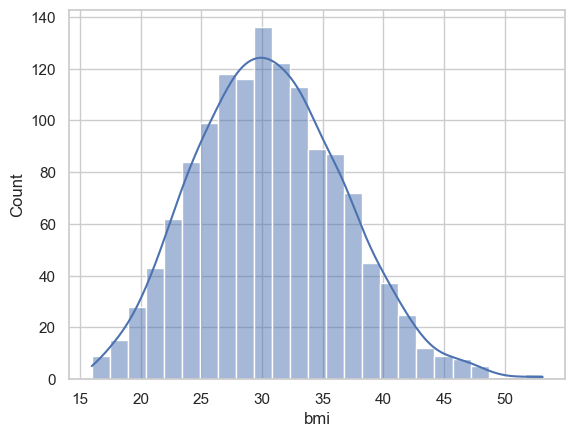

In [9]:
#Distribution of BMI with respect to charges by scatter plot.
distribution_bmi=sns.set(style="whitegrid")
distribution_bmi=sns.histplot(data=data, x="bmi", kde=True)

In [10]:
#check is there any null data.
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#observed that no empty data in the dataset

Outlier Detection

Outlier is a data point that significantly far from other data points in the dataset.

In order to find the outliers,IQR(Inter-quartile Range)Rule is used.

1) IQR=Q3-Q1 2) Q3:Percentile75 3) Q1:Percentile25 4) Lower Boundary:The minimum value data points 5) Lower Boundary:Q1-1.5IQR 6) Upper Boundary:The maximum value data points 7) Upper Boundary:Q3+1.5IQR

Data points that are not in range that is specified by lower boundary and upper boundary are called as Outlier.

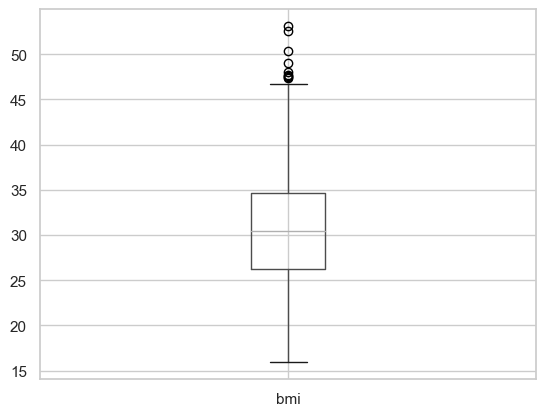

In [12]:
#check is there any outlier in the bmi.
data.boxplot(column=['bmi']);

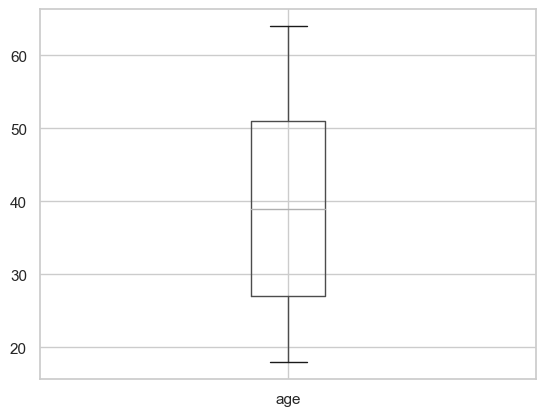

In [13]:
#check is there any outlier in the age.
data.boxplot(column=['age']);

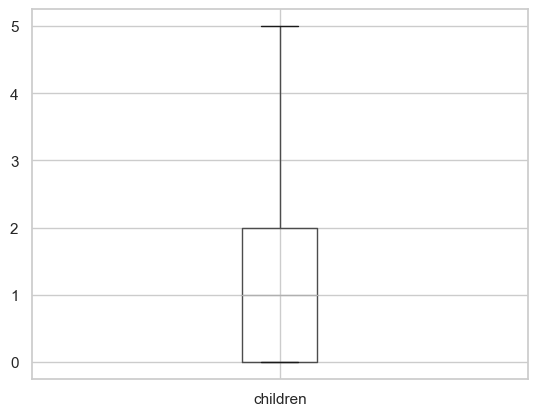

In [14]:
#check is there any outlier in the children.
data.boxplot(column=['children']);

# Remove Outliers

In [15]:
#Define Q1 and Q3 by using 25% and 75% Quantiles.
Q1=data['bmi'].quantile(0.25)
Q3=data['bmi'].quantile(0.75)
#Define IQR as the difference of Q3 and Q1
IQR=Q3-Q1
#Define Lower Boundary and Upper Boundary
lower_boundary=Q1-1.5*IQR
upper_boundary=Q3+1.5*IQR

In [16]:
#In order to find the index of outliers, define a list
#This list contains row numbers of outliers
outliers_list=data.index[(data["bmi"]<lower_boundary)|(data["bmi"]>upper_boundary)]
#Create an empty list that stores indices of outliers
outliers_index=[]
outliers_index.extend(outliers_list)

In [17]:
#Indices of outliers
outliers_index

[116, 286, 401, 543, 847, 860, 1047, 1088, 1317]

In [18]:
#it is observed that there are 9 outliers in the bmi features.

In [19]:
#Create a new dataset that is cleaned from rows of outliers.
outliers_index = sorted(set(outliers_index))
data_cleaned=data.drop(outliers_index)

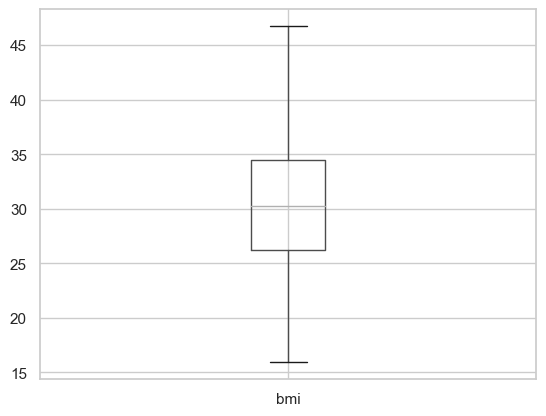

In [20]:
#New dataset has no outliers.
data_cleaned.boxplot(column=['bmi']);

In [21]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
#9 rows belong to outlier are removed from the dataset
data_cleaned.shape

(1329, 7)

Correlation Graphs

Correlation Graph Of:

1.Smoker and charges 2.Smoker and region 3.BMI and Sex 4.Age and BMI 5.BMI and Children 6.BMI and Charges

In [23]:
#Show_corr function that results a barplot.
#Shows Correlation from highest to lowest.
def show_corr(dataset, target_name, n_most=None):
    if n_most is None:
        n_most=len(dataset.columns.values)-1
    corr_matrix=dataset.corr().abs()
    
    most_correlated_features=corr_matrix[target_name].sort_values(ascending=False).drop(target_name)
    most_correlated_feature_names=most_correlated_features.index.values
    
    fig, ax=plt.subplots(figsize=(15,5))
    plt.xticks(rotation="90")
    sns.barplot(x=most_correlated_feature_names, y=most_correlated_features)
    plt.title("Correlation of features with {}".format(target_name))

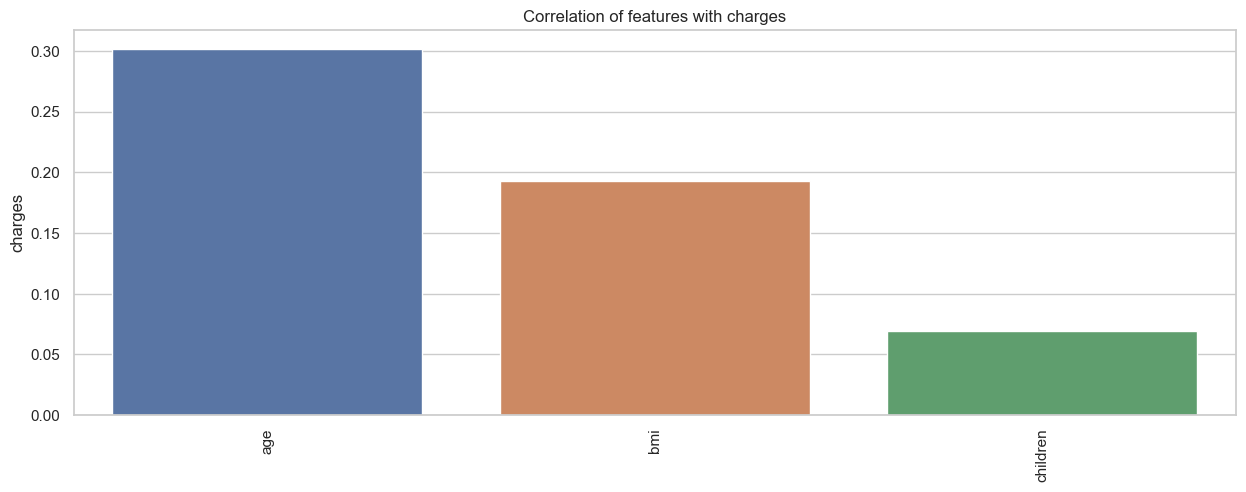

In [24]:
#correlation of all features when charges feature is target
show_corr(dataset=data_cleaned, target_name='charges')

In [25]:
#New dataset with cleaned from outliers is created as .csv file
data_cleaned.to_csv("insurance_cleaned.csv", index=False)

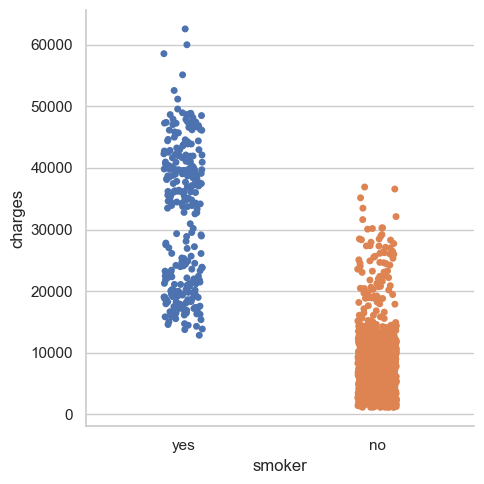

In [26]:
#Correlation between smoker and charges.
corr_smoker_charges=sns.catplot(x="smoker", y="charges", data=data_cleaned)

In [27]:
#Correlation between region and smoker.
corr_region_smoker = data_cleaned.groupby(["region", "smoker"]).size().reset_index(name="Numb")
corr_region_smoker

,region,smoker,Numb
0,northeast,no,256
1,northeast,yes,67
2,northwest,no,267
3,northwest,yes,58
4,southeast,no,268
5,southeast,yes,89
6,southwest,no,267
7,southwest,yes,57


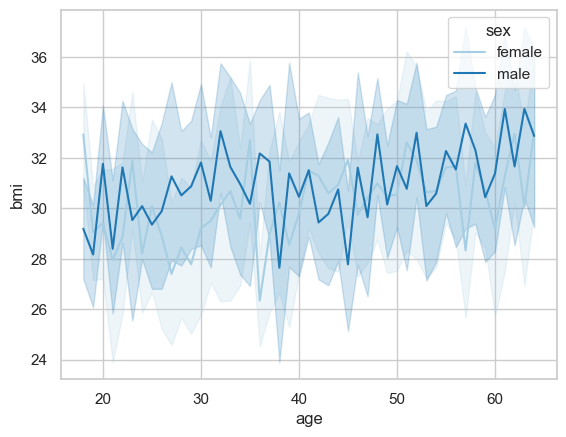

In [28]:
#correlation b/w bmi and sex.
corr_bmi_sex=sns.lineplot(x="age",y="bmi",hue="sex",data=data_cleaned,palette="Paired")

In [29]:
#no. of childrens for each region.
num_children=data_cleaned.groupby("region")["children"].sum()
num_children

region
northeast    337
northwest    373
southeast    378
southwest    369
Name: children, dtype: int64

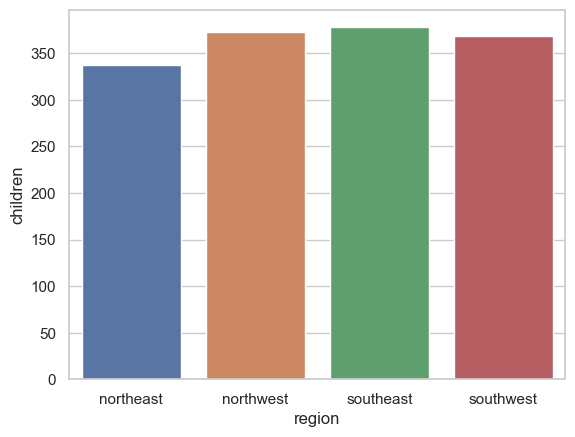

In [30]:
#create a bar plot that show no. of chlidrens with respect regions
num_children_bar=sns.barplot(x= num_children.index, y=num_children)

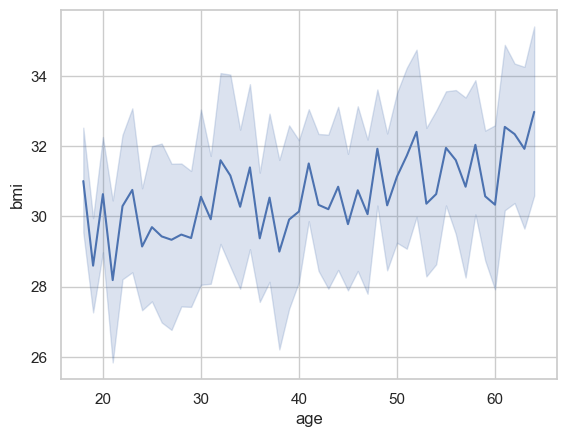

In [31]:
#Correlation b/w age and bmi.
corr_age_bmi=sns.lineplot(x="age",y="bmi",data=data_cleaned)

In [32]:
#Correlation b/w bmi and children
corr_bmi_children=data_cleaned.groupby(["children"])["bmi"].describe()
corr_bmi_children

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,571.0,30.448809,5.887124,15.960,26.12500,30.3000,34.550,46.20
1,320.0,30.386500,5.752371,16.815,26.55250,29.9225,34.200,46.53
2,238.0,30.836450,6.349372,16.815,25.75875,31.4500,35.275,46.70
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.320,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.660,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.055,46.75


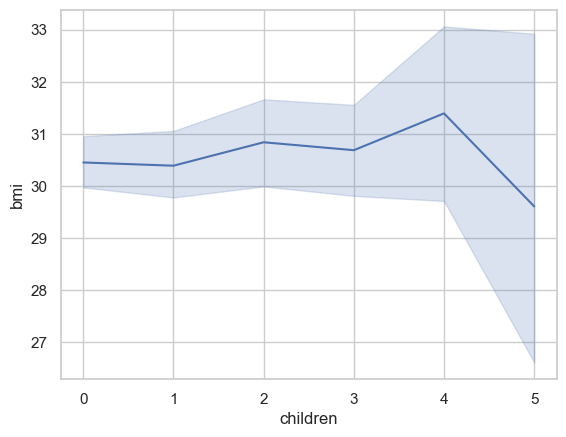

In [33]:
#line plot of bmi vs children.
line_bmi_children=sns.lineplot(x="children", y="bmi", data=data_cleaned)

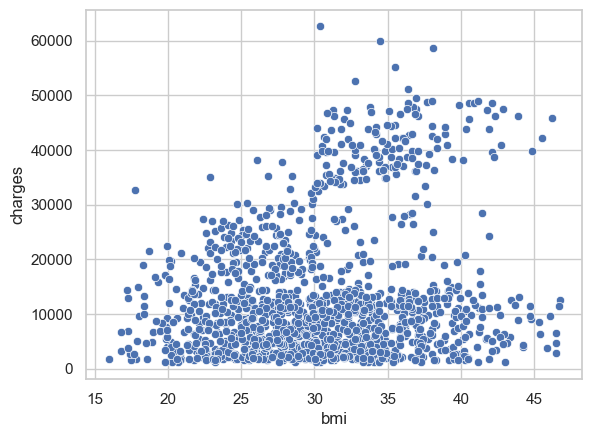

In [34]:
#Correlation b/w bmi and charges.
corr_bmi_charges=sns.scatterplot(x="bmi", y="charges", data=data_cleaned)

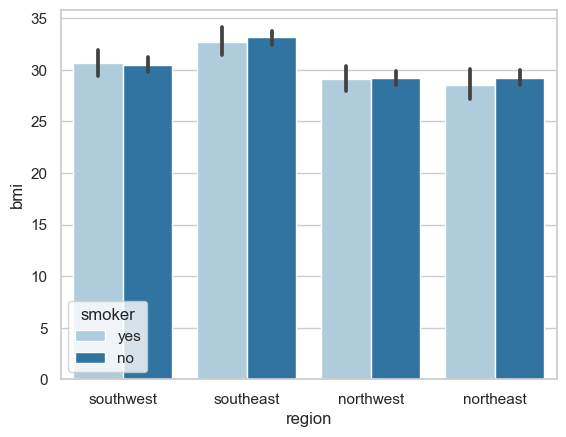

In [35]:
#Correlation b/w region,smoker and bmi.
corr_region_smoker_bmi=sns.barplot(x="region", y="bmi", hue="smoker", data=data_cleaned,palette="Paired")


<AxesSubplot:>

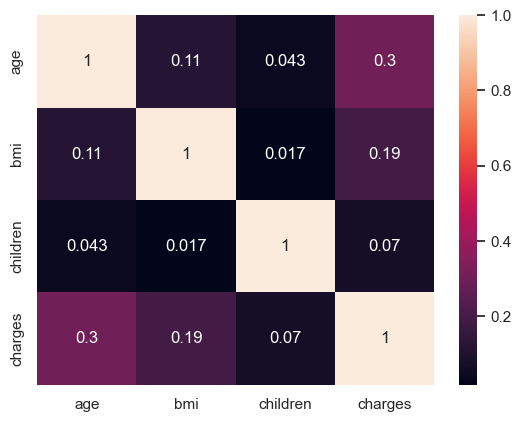

In [36]:
sns.heatmap(data_cleaned.corr(), annot= True)

One-Hot Encoding Technique
1)One-Hot Encoding technique is used when there are categorical features which are not integer values inthe dataset 2)One-Hot Encoding creates columns for each value of the categorical features 3)All the smoker values with no answer are represented as 1 in the smoker_no column, & the rest are represented as 0

There are three categorical features that are needed to be encoded: Sex Smoker Region

In [37]:
#One-Hot Encoding Via using get_dummies.
data_encoded = pd.get_dummies(data_cleaned, columns=["sex", "smoker", "region"])
data_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [38]:
data_encoded.corr()
data_cleaned.corr()

,age,bmi,children,charges
age,1.000000,0.114686,0.043041,0.302022
bmi,0.114686,1.000000,0.017355,0.193196
children,0.043041,0.017355,1.000000,0.069739
charges,0.302022,0.193196,0.069739,1.000000


Train and Test Data

To create train and test data,train_test_split method is used.
70-30 ratio is used.In other words, the training dataset has 70% of the dataset and the test dataset has the 30% of the dataset

In [39]:
X=data_encoded.drop("charges", axis=1)
y=data_encoded.loc[:, "charges"]

#Split the dataset into train and test sets with 70-30 ratio.
X_train, X_test , y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3)

In [40]:
#Convert y_train and y_test to pandas DataFrame.
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [41]:
#Check all of the data are pandas DataFrame.
print(f"X_train type: {type(X_train)}\nX_test type:{type(X_test)}\ny_train type:{type(y_train)}\ny_test type: {type(y_test)}")

X_train type: <class 'pandas.core.frame.DataFrame'>
X_test type:<class 'pandas.core.frame.DataFrame'>
y_train type:<class 'pandas.core.frame.DataFrame'>
y_test type: <class 'pandas.core.frame.DataFrame'>


Scaling the Dataset

*Data Points can be far away from eachother

*Scaling is used to make data points closer to each other

*Data points become more generalized by being closer

In [42]:
# Scale dataset to normalize.
scaler_func=MinMaxScaler()
data_list=["X_train","X_test", "y_train","y_test"]
data_list_index=0
for index in [X_train,X_test,y_train,y_test]:
    scaler_func.fit_transform(index)
    print(f"Min {data_list[data_list_index]}:", scaler_func.data_min_)
    print(f"Max {data_list[data_list_index]}:", scaler_func.data_max_)
    data_list_index += 1

Min X_train: [18.   15.96  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
Max X_train: [64.   46.75  5.    1.    1.    1.    1.    1.    1.    1.    1.  ]
Min X_test: [18.    16.815  0.     0.     0.     0.     0.     0.     0.     0.
  0.   ]
Max X_test: [64.  46.2  5.   1.   1.   1.   1.   1.   1.   1.   1. ]
Min y_train: [1121.8739]
Max y_train: [62592.87309]
Min y_test: [1135.9407]
Max y_test: [60021.39897]


Model Selection and Performance Comparsion

In [43]:
#Create an object using the LinearRegression() class.
linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(max_depth=3)
random_forest_model = RandomForestRegressor(max_depth=4, n_estimators=500)
gradient_boosting_model = GradientBoostingRegressor(max_depth=3, n_estimators=100, learning_rate=.2)
ada_boost_regressor_model = AdaBoostRegressor(n_estimators=50, learning_rate=.01)

In [44]:
#create a list that contains the regression models.
regression_models = [("Linear Regression", linear_regression_model),
                    ("Decision Tree", decision_tree_model),
                    ("Random Forest", random_forest_model),
                    ("Gradient Boosting", gradient_boosting_model),
                    ("Ada Boost Regressor", ada_boost_regressor_model)]

In [45]:
#Create a list that contains r2 scores of models
r2_scores = []

In [46]:
#Create a for loop to check cross validation scores of the regression of models.
for regression_name, regression_model in regression_models:
    cross_validation_scores = cross_val_score(regression_model, X_train,y_train.values.ravel(), scoring="r2")
    r2_scores.append(cross_validation_scores.mean()*100)
    
    print(f"r2 score of {regression_name}: ", str(round(sum(cross_validation_scores)/5*100,4)), "%\n")


r2 score of Linear Regression:  73.0366 %

r2 score of Decision Tree:  82.9196 %

r2 score of Random Forest:  84.4665 %

r2 score of Gradient Boosting:  82.0433 %

r2 score of Ada Boost Regressor:  83.5328 %



Best Performing Model:Random Forest

# Hyper-parameter optimization

In [47]:
#create a new random forest model

best_model_rand_forest = RandomForestRegressor()
rand_forest_parameters = [{"max_depth": [2,3,4,5,6],
                          "n_estimators":[400,500,600]}]
rand_forest_gridCV = GridSearchCV(best_model_rand_forest,
                                 rand_forest_parameters,
                                 cv = 5,
                                 n_jobs = -1)

#Train the model
rand_forest_gridCV.fit(X_train,y_train.values.ravel())
#Get the best parameters for Random Forest Regressor
print(rand_forest_gridCV.best_params_)
print(rand_forest_gridCV.best_score_)

{'max_depth': 4, 'n_estimators': 600}
0.8449286538864772


Results of Hyper-Parameter Optimization

The best parameters of Random Forest Regressor:

* max_depth:4

* n_esimators:600

The best score of the Random Forest Regressor: *0.8643832857241271

Evaluate these results by using the best parameters found by using Hyper-Parameter Optimization

In [48]:
RMSE=cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5,scoring="neg_mean_squared_error")
print("Mean Square Error Of XGBoost:", (RMSE, 3))
RMAE=cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5,scoring="neg_mean_absolute_error")
print("Mean Absolute Error Of XGBoost:", (RMAE, 3))
r2=cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5,scoring="r2").mean()
print("r2 Score Of XGBoost:", str(round(r2*100,4))+"%\n")

Mean Square Error Of XGBoost: (array([-23078822.88071859, -21203146.9825392 , -19001764.29026262,
       -19402197.97018545, -21946398.38520966]), 3)
Mean Absolute Error Of XGBoost: (array([-2764.78501084, -2530.28943577, -2570.04315446, -2415.21084515,
       -2651.5194558 ]), 3)
r2 Score Of XGBoost: 84.453%

